<a href="https://colab.research.google.com/github/jugalshirodkar/AIML/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving train.csv to train (8).csv
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition 

<ipython-input-9-aeb8140b716e>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LotFrontage'] = X['LotFrontage'].fillna(X['LotFrontage'].mean())
<ipython-input-9-aeb8140b716e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Alley'] = X['Alley'].fillna(X['Alley'].mode()[0])


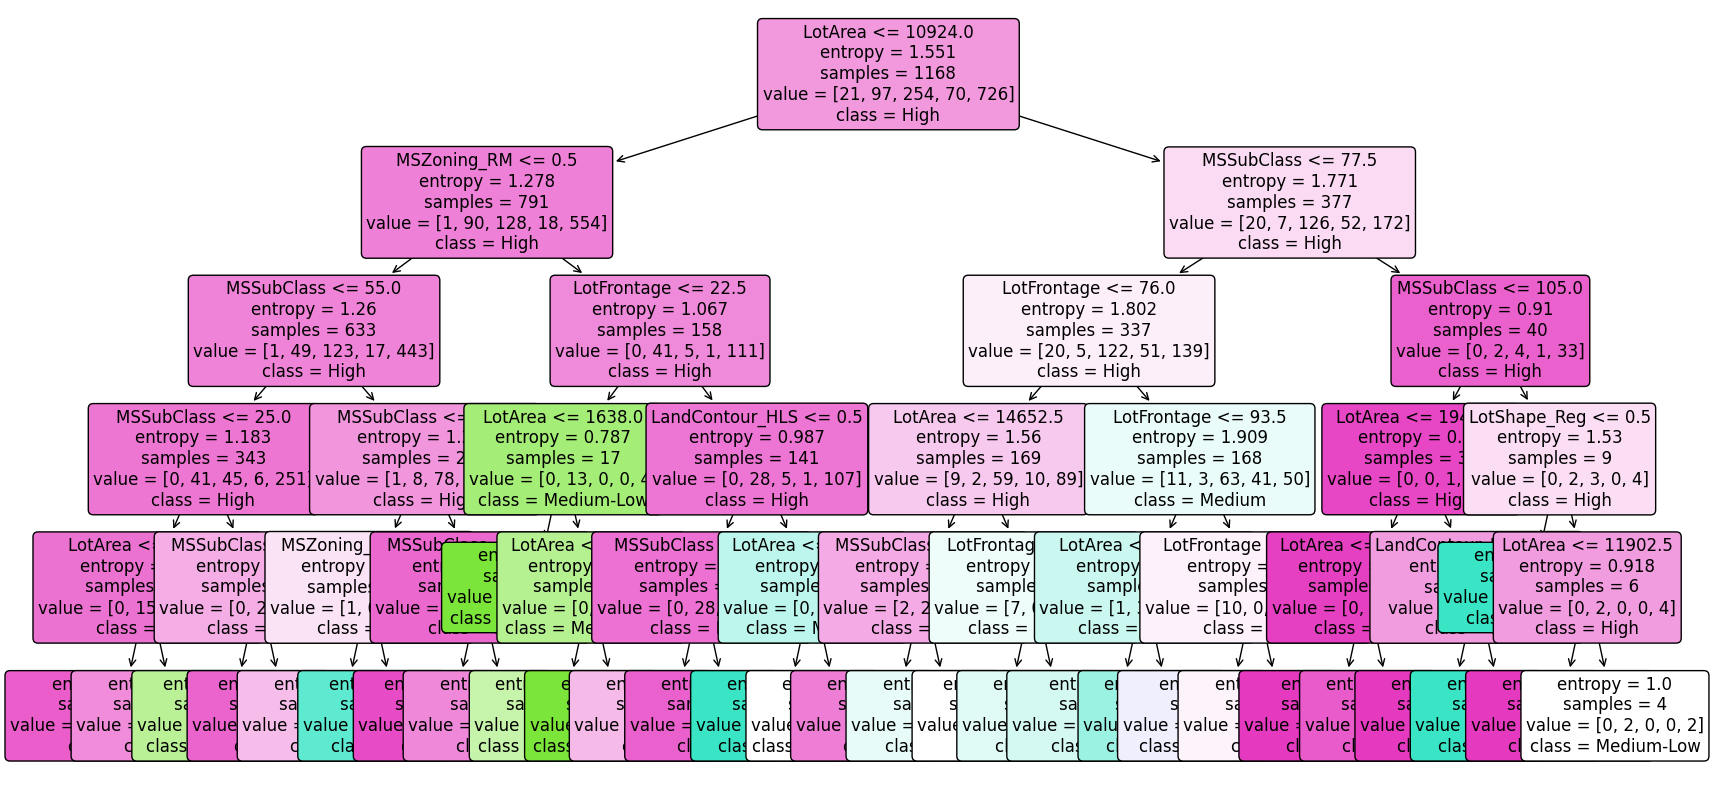

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from google.colab import files
import io

uploaded = files.upload()

filename = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(df.head())

X = df[['MSSubClass', 'LotFrontage', 'LotArea', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities']]
y = df['SalePrice']

bins = [0, 100000, 200000, 300000, 400000, df['SalePrice'].max()]
labels = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']
y_binned = pd.cut(df['SalePrice'], bins=bins, labels=labels)

X['LotFrontage'] = X['LotFrontage'].fillna(X['LotFrontage'].mean())
X['Alley'] = X['Alley'].fillna(X['Alley'].mode()[0])

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Create a Decision Tree model with entropy criterion
model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=labels, filled=True, rounded=True, fontsize=12)
plt.show()
